In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import pandas as pd
import numpy as np
from task2 import main as get_params

In [45]:
task2_table = pd.read_csv('task2_table_data.csv').reset_index()

sig_b, sig_m, dva_cc = [], [], []
for b, m, cc in task2_table.apply(lambda x: get_params(**x[['Dout', 't', 'T', 'p', 'steel_type', 'Nz', 'Mx', 'My', 'dva_c_max','defect_type', 'index', 'problem_type']].to_dict()), axis=1):
    sig_b += [b*1e-6]
    sig_m += [m*1e-6]
    dva_cc += [cc]

task2_table['sig_b'] = sig_b
task2_table['sig_m'] = sig_m
task2_table['dva_cc'] = [cc for cc in dva_cc]
task2_table['2cc<2cmax'] = task2_table['dva_cc'] <= task2_table['dva_c_max']

# task2_table.groupby(['Режим','Название СС']).first()
task2_table

,index,problem_type,Regime,defect_type,steel_type,Название СС,Dout,t,T,p,Nz,Mx,My,dva_c_max,sig_b,sig_m,dva_cc,2cc<2cmax
0,0,ППН,НУЭ,Кольцевой дефект,Сталь 20,208,0.273,0.016,285,6900000.0,10000.0,6940.0,-13507.0,0.428827,19.435045,25.139305,0.3845580156384337,True
1,1,ППН,НУЭ,Кольцевой дефект,Сталь 20,210,0.273,0.016,285,6900000.0,12000.0,-4112.0,-6554.0,0.428827,9.902260,25.294125,0.4043263443424144,True
2,2,ППН,НУЭ,Кольцевой дефект,Сталь 20,227,0.273,0.016,285,6900000.0,12000.0,5841.0,-4882.0,0.428827,9.742819,25.294125,0.4046799811697173,True
3,3,ППН,МРЗ,Кольцевой дефект,Сталь 20,208,0.273,0.016,285,6900000.0,3700.0,3190.0,5740.0,0.428827,8.404491,24.651622,0.4101435447453414,True
4,4,ППН,МРЗ,Кольцевой дефект,Сталь 20,210,0.273,0.016,285,6900000.0,6600.0,2340.0,2200.0,0.428827,4.110557,24.876111,0.41921526517195873,True
5,5,ППН,МРЗ,Кольцевой дефект,Сталь 20,227,0.273,0.016,285,6900000.0,3900.0,2040.0,2780.0,0.428827,4.413106,24.667104,0.419351757266094,True
6,6,ППН,НУЭ+МРЗ,Кольцевой дефект,Сталь 20,208,0.273,0.016,285,6900000.0,13700.0,10130.0,19247.0,0.428827,27.836416,25.425722,0.3669339840329316,True
7,7,ППН,НУЭ+МРЗ,Кольцевой дефект,Сталь 20,210,0.273,0.016,285,6900000.0,18600.0,6452.0,8754.0,0.428827,13.917905,25.805031,0.3937589782175241,True
8,8,ППН,НУЭ+МРЗ,Кольцевой дефект,Сталь 20,227,0.273,0.016,285,6900000.0,15900.0,7881.0,7662.0,0.428827,14.067482,25.596024,0.3941844654899753,True
9,9,ППН,НУЭ,Кольцевой дефект,Сталь 20,32,0.325,0.019,285,6900000.0,13835.0,5973.0,3996.0,0.510509,5.462465,25.196137,0.49392855618555354,True


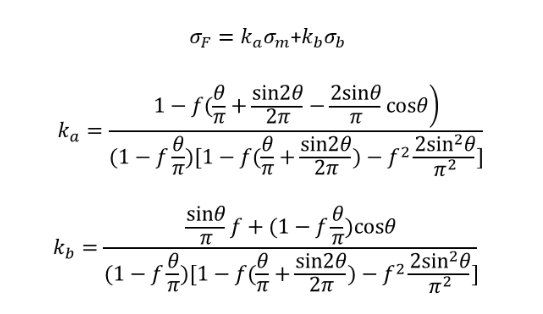

In [32]:
fun_2_cc = lambda x: x + 20

from scipy.optimize import fsolve, root, bisect, newton_krylov, diagbroyden

diagbroyden(lambda X: fun_2_cc(X)/2, 0)

array(-20.)

In [ ]:
tetta = lambda dva_cc: dva_cc/(2*Rin)
ka_nominator = lambda dva_cc: 1 - f * (tetta(dva_cc)/np.pi + np.sin(2*tetta(dva_cc))/(2*np.pi) - 2*np.sin(tetta(dva_cc))/np.pi*np.cos(tetta(dva_cc)))
kb_nominator = lambda dva_cc: np.sin(tetta(dva_cc))/np.pi*f + (1 - f*tetta(dva_cc)/np.pi)*np.cos(dva_cc)
denominator =  lambda dva_cc: (1 - f * tetta(dva_cc)/np.pi)*(1 - f*(tetta(dva_cc)/np.pi + np.sin(2*tetta(dva_cc))/(2*np.pi)) - (f**2)*(2*(np.sin(tetta(dva_cc))**2)/(np.pi**2)))
func = lambda dva_cc: (ka_nominator(dva_cc)/denominator(dva_cc))*sig_m + (kb_nominator(dva_cc)/denominator(dva_cc))*sig_b - sig_f

from scipy.optimize import fsolve, root, bisect

fsolve(lambda X: fun_2_cc(X)/2, 0)

In [ ]:
1 - f * (d)

In [ ]:
(()/())*sig_m + (()/())*sig_b - sig_f